# Analysis of Foursquare Model Weight
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing
    - import Models Weight
    - Plot top 10 most important weights for every model
    
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [13]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
weights_results = ['gent00_16.csv','Ongoing_adv_gent.csv',\
'pct_ch_hinc00_16.csv','pct_ch_medrent00_16.csv','pct_ch_medhval00_16.csv',\
'pct_ch_percol00_16.csv',
'Supergent16.csv']
weights_results

['gent00_16.csv',
 'Ongoing_adv_gent.csv',
 'pct_ch_hinc00_16.csv',
 'pct_ch_medrent00_16.csv',
 'pct_ch_medhval00_16.csv',
 'pct_ch_percol00_16.csv',
 'Supergent16.csv']

In [15]:
weights_df_list = []
for file in weights_results:
    print(file)
    temp = pd.read_csv('./Results/'+file)
    temp.rename(columns={'Unnamed: 0':'St_method'}, inplace=True)
    weights_df_list.append(temp)

gent00_16.csv
Ongoing_adv_gent.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv
Supergent16.csv


In [16]:
binary_typs = []
for w in weights_results:
    print(w)
    binary_typs.append(w[:-4])
binary_typs

gent00_16.csv
Ongoing_adv_gent.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv
Supergent16.csv


['gent00_16',
 'Ongoing_adv_gent',
 'pct_ch_hinc00_16',
 'pct_ch_medrent00_16',
 'pct_ch_medhval00_16',
 'pct_ch_percol00_16',
 'Supergent16']

In [17]:
weights_df_list[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index[::-1]

Index(['phisp00', 'pernwh00', 'pag25up00', 'per_rent_00', 'unempden00',
       'popden00', 'medrent00', 'pop00', 'medhval00', 'hinc00'],
      dtype='object')

In [18]:
top10_pd = pd.DataFrame()
for i, binary_target in enumerate(binary_typs):
    print(i, binary_target)
    for st_method in list(weights_df_list[i].index):
        print('st_method',st_method)
        pd_series_by_st_method = weights_df_list[i].loc[st_method]
        for k, variable in enumerate(pd_series_by_st_method[1:].abs().sort_values(ascending=False)[:10].index[::-1]):
            print(k,variable)
            top10_pd.loc[st_method,variable] = k
top10_pd

0 gent00_16
st_method 0
0 phisp00
1 pernwh00
2 pag25up00
3 per_rent_00
4 unempden00
5 popden00
6 medrent00
7 pop00
8 medhval00
9 hinc00
st_method 1
0 percol00
1 pnhblk00
2 TOD
3 pasian00
4 pernwh00
5 pag25up00
6 unempden00
7 medrent00
8 carcommuters_00
9 per_rent_00
st_method 2
0 percol00
1 pnhblk00
2 TOD
3 pasian00
4 pernwh00
5 pag25up00
6 unempden00
7 medrent00
8 carcommuters_00
9 per_rent_00
st_method 3
0 pernwh00
1 phisp00
2 carcommuters_00
3 pasian00
4 pnhblk00
5 medhval00
6 pop00
7 hinc00
8 per_rent_00
9 pag25up00
st_method 4
0 TOD
1 medhval00
2 pasian00
3 hinc00
4 phisp00
5 carcommuters_00
6 pernwh00
7 pnhblk00
8 pag25up00
9 per_rent_00
st_method 5
0 percol00
1 pnhblk00
2 TOD
3 pasian00
4 pernwh00
5 pag25up00
6 unempden00
7 medrent00
8 carcommuters_00
9 per_rent_00
st_method 6
0 percol00
1 pnhblk00
2 TOD
3 pasian00
4 pernwh00
5 pag25up00
6 unempden00
7 medrent00
8 carcommuters_00
9 per_rent_00
st_method 7
0 pernwh00
1 phisp00
2 carcommuters_00
3 pasian00
4 pnhblk00
5 medhval00
6

,phisp00,pernwh00,pag25up00,per_rent_00,unempden00,popden00,medrent00,pop00,medhval00,hinc00,percol00,pnhblk00,TOD,pasian00,carcommuters_00
0,0.0,1.0,3.0,2.0,9.0,4.0,5.0,7.0,6.0,8.0,2.0,0.0,0.0,NaN,1.0
1,3.0,1.0,0.0,8.0,7.0,3.0,9.0,7.0,6.0,9.0,2.0,4.0,6.0,7.0,5.0
2,3.0,1.0,0.0,8.0,5.0,3.0,9.0,8.0,6.0,9.0,2.0,4.0,6.0,7.0,5.0
3,7.0,6.0,0.0,4.0,9.0,0.0,9.0,8.0,3.0,8.0,1.0,5.0,0.0,4.0,2.0
4,6.0,8.0,1.0,2.0,9.0,5.0,9.0,3.0,1.0,4.0,0.0,7.0,3.0,2.0,3.0
5,2.0,0.0,8.0,7.0,5.0,3.0,9.0,7.0,6.0,9.0,1.0,4.0,6.0,3.0,5.0
6,3.0,1.0,0.0,8.0,5.0,3.0,9.0,8.0,6.0,9.0,2.0,4.0,6.0,7.0,5.0
7,7.0,6.0,0.0,4.0,9.0,0.0,9.0,8.0,3.0,8.0,1.0,5.0,0.0,4.0,2.0
8,7.0,6.0,0.0,4.0,9.0,0.0,9.0,8.0,3.0,8.0,1.0,5.0,0.0,4.0,2.0
9,3.0,1.0,0.0,8.0,5.0,3.0,9.0,8.0,6.0,9.0,2.0,4.0,6.0,7.0,5.0


In [19]:
print(weights_results[3])
st_method = 8
print(st_method, (weights_df_list[3].loc[st_method][0]))
weights_df_list[3].loc[st_method][1:].abs().sort_values(ascending=False)[:10].index[::-1]

pct_ch_medrent00_16.csv
8 Logit_Minmaxed


Index(['TOD', 'per_rent_00', 'carcommuters_00', 'medhval00', 'pag25up00',
       'pasian00', 'percol00', 'hinc00', 'pop00', 'medrent00'],
      dtype='object')

medrent00          104.0
hinc00              98.0
pop00               88.0
unempden00          86.0
per_rent_00         67.0
pasian00            56.0
medhval00           55.0
pnhblk00            51.0
phisp00             51.0
carcommuters_00     42.0
dtype: float64


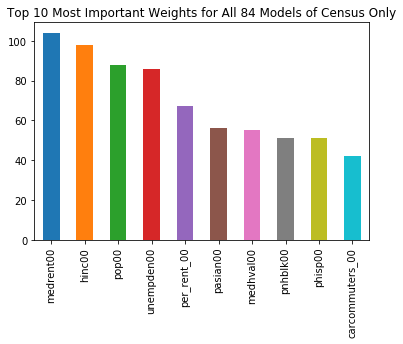

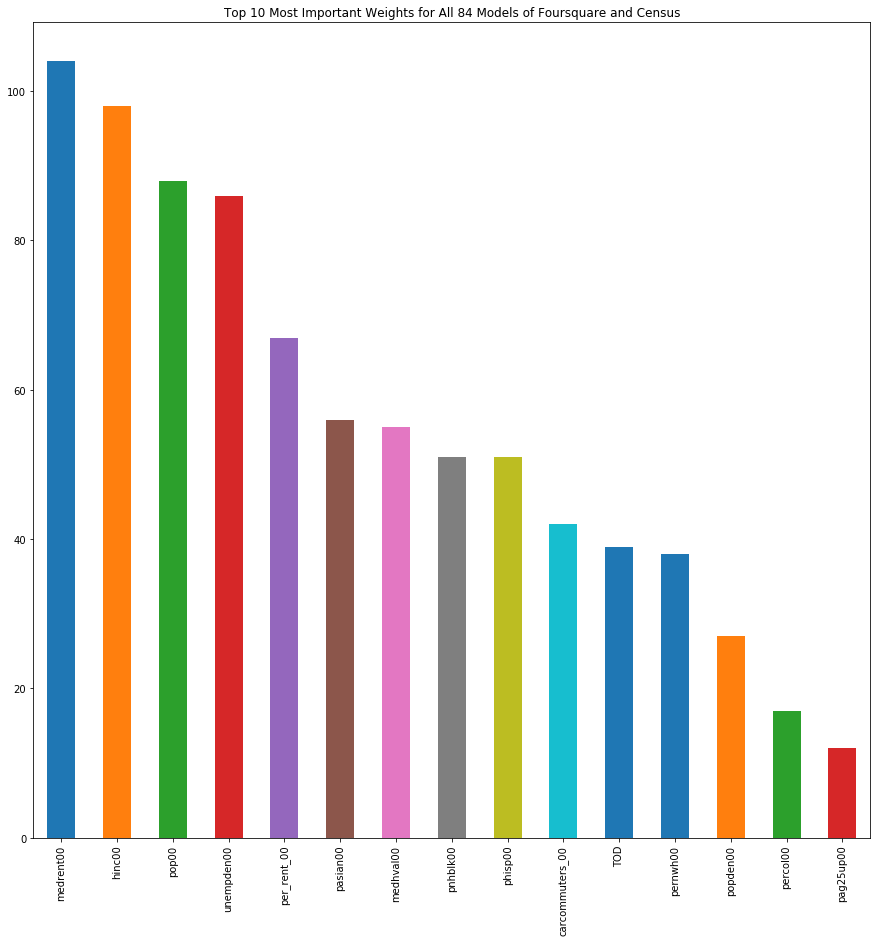

In [23]:
print(top10_pd.sum(axis=0).sort_values(ascending=False)[:10])
top10_pd.sum(axis=0).sort_values(ascending=False)[:10].plot(kind='bar', title = 'Top 10 Most Important Weights for All 84 Models of Census Only')
plt.show()
top10_pd.sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize = (15,15), title = 'Top 10 Most Important Weights for All 84 Models of Foursquare and Census')

In [52]:
# top10_pd = pd.DataFrame():
# for binary_variable in binary_variables:
#     top10_pd[binary_variable] = weights_df[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index

Index(['Rating_sum10', 'Class_Optional_sum10', 'Visits',
       'Class_Necessary_sum10', 'Checkins', 'Category_Unknown_sum10',
       'Class__sum10', 'Users', 'Category_Consumption_sum10',
       'Category_Nutrition_sum10'],
      dtype='object')